In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from chrislib.general import view, tile_imgs, view_scale, uninvert
from chrislib.data_util import load_image

from intrinsic.pipeline import run_pipeline
from intrinsic.model_util import load_models

# load the models from the given paths
models = load_models('paper_weights')

# load an image (np float array in [0-1])
image = load_image('./test_images/1.jpeg')

# run the model on the image using R_0 resizing
results = run_pipeline(
    models,
    image,
    resize_conf=0.0,
    maintain_size=True
)

albedo = results['albedo']
inv_shd = results['inv_shading']

# compute shading from inverse shading
shading = uninvert(inv_shd)

Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v1.0/final_weights.pt" to /home/vishal/.cache/torch/hub/checkpoints/final_weights.pt
100%|██████████| 485M/485M [01:39<00:00, 5.12MB/s] 
Downloading: "https://github.com/facebookresearch/WSL-Images/zipball/main" to /home/vishal/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /home/vishal/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100%|██████████| 340M/340M [00:34<00:00, 10.4MB/s] 
/home/vishal/anaconda3/envs/iidecomp/lib/python3.8/site-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be

In [30]:
images = []
albedos = []
shadings = []

from chrislib.general import view, tile_imgs, view_scale, uninvert
from chrislib.data_util import load_image

from intrinsic.pipeline import run_pipeline
from intrinsic.model_util import load_models

# load the models from the given paths
models = load_models('paper_weights')

for i in range(4):
    # load an image (np float array in [0-1])
    image = load_image(f'./test_images/{i+1}.jpeg')

    # run the model on the image using R_0 resizing
    results = run_pipeline(
        models,
        image,
        resize_conf=0.0,
        maintain_size=True
    )

    albedo = results['albedo']
    inv_shd = results['inv_shading']

    # compute shading from inverse shading
    shading = uninvert(inv_shd)

    images.append(image)
    albedos.append(albedo)
    shadings.append(shading)

Using cache found in /home/vishal/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/vishal/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


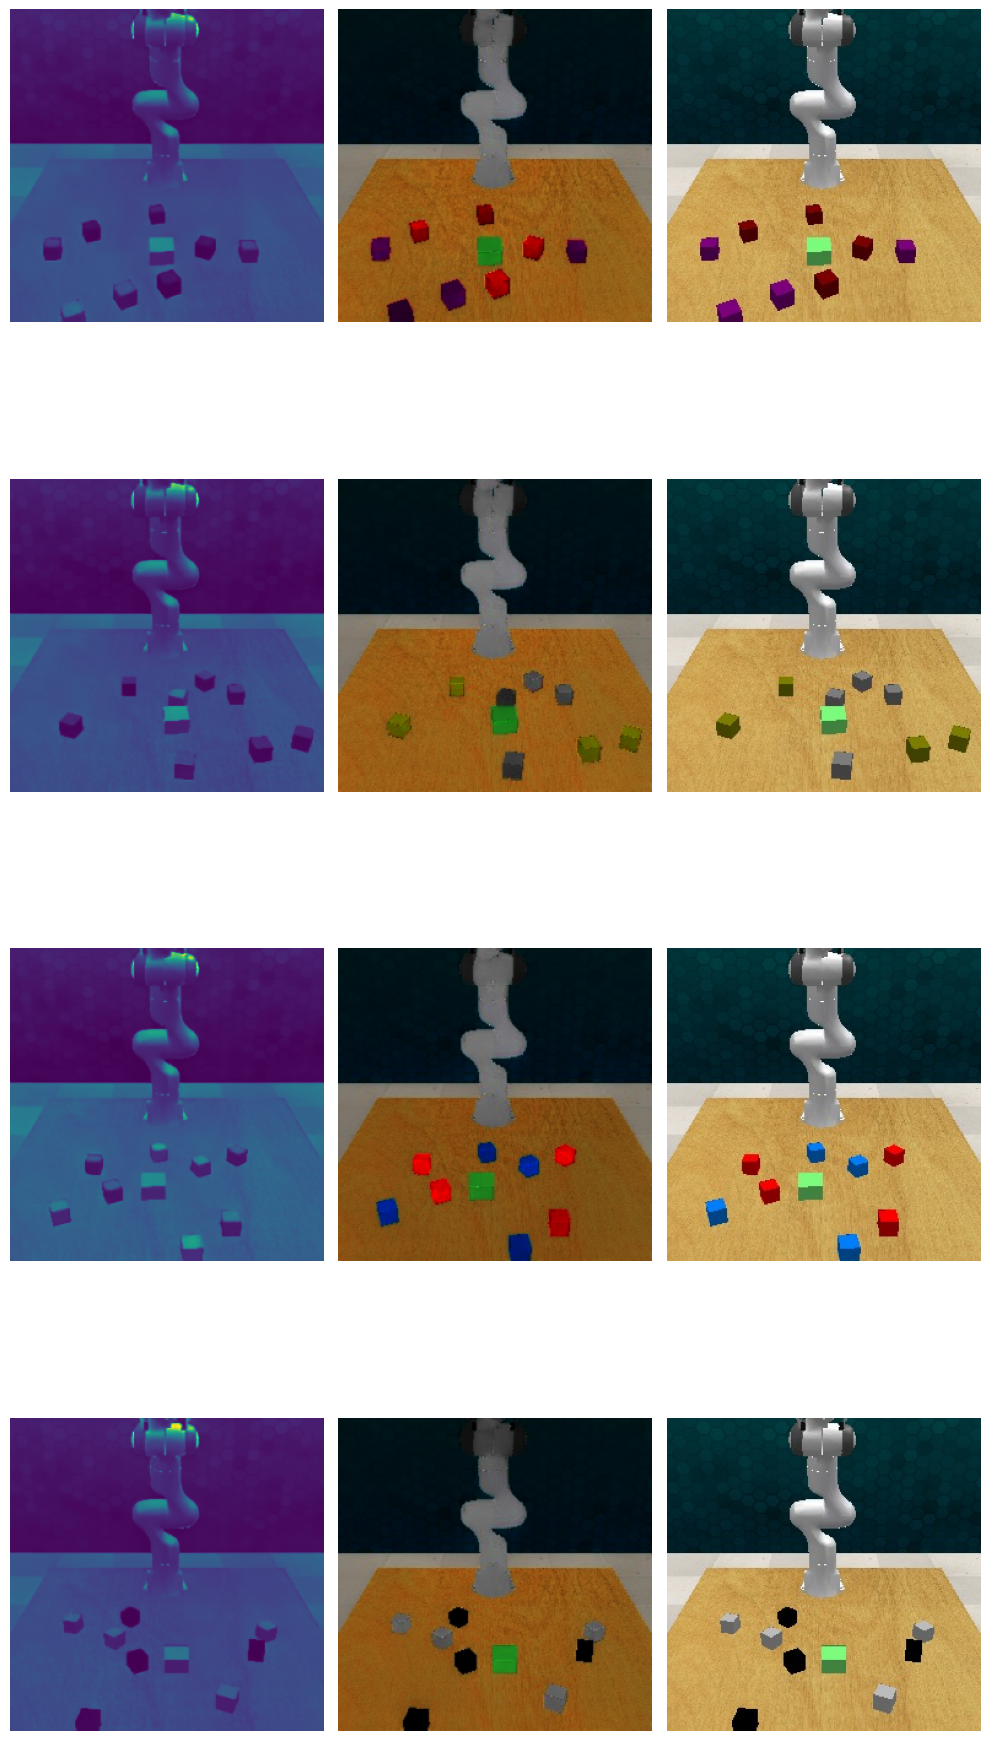

In [31]:
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 3,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    # for j in range(2):
        # if j==0:
        #     axes[i, j].imshow(images[i], )
        # elif j==1:
        #     axes[i, j].imshow(albedos[i], )
        # else:
            # norm_shading = (shadings[i] - np.min(shadings[i]))/(np.max(shadings[i]) - np.min(shadings[i]))
    axes[i, 0].imshow(shadings[i]) #np.stack((shadings[i],)*3, axis=-1).repeat(),) #norm_shading) #shadings[i])
    axes[i, 1].imshow(albedos[i])
    axes[i, 2].imshow(images[i])
    axes[i, 0].axis('off')  # Turn off axis
    axes[i, 1].axis('off') 
    axes[i, 2].axis('off') 

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [39]:
'''Save outputs
'''
import cv2
for i in range(4):
    norm_shading = (shadings[i] - np.min(shadings[i]))/(np.max(shadings[i]) - np.min(shadings[i]))
    cv2.imwrite(f'./results/intrinsic_outs/shading_{i+1}.png', norm_shading[...,::-1]*255) #np.stack((shadings[i],)*3, axis=-1).repeat(),) #norm_shading) #shadings[i])
    cv2.imwrite(f'./results/intrinsic_outs/albedo_{i+1}.png', albedos[i][...,::-1]*255)
    # cv2.imwrite(f'_{i}.png'images[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


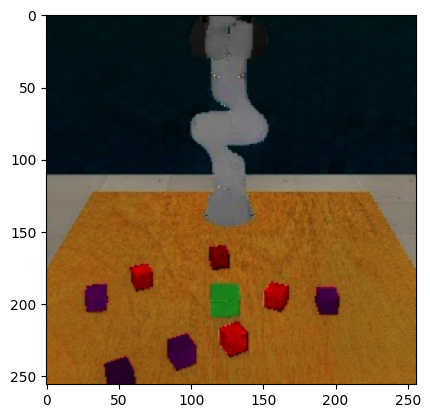

In [6]:
plt.imshow(albedo)

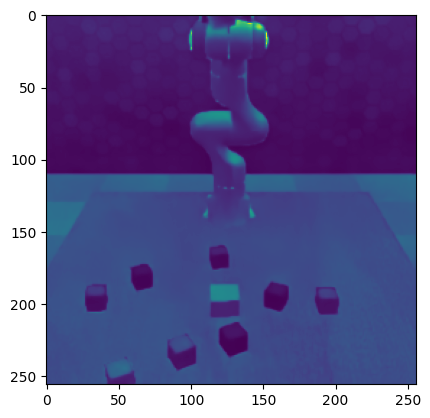

In [7]:
plt.imshow(shading)

In [35]:
albedo.max()

0.79750156

In [16]:
import numpy as np
norm_shading = (shadings[i] - np.min(shadings[i]))/(np.max(shadings[i]) - np.min(shadings[i]))

print(norm_shading.shape)
print(np.min(norm_shading))
print(np.max(norm_shading))

(256, 256)
0.0
1.0
